<a href="https://colab.research.google.com/github/ShaunakNandi/EIP3_Ph2/blob/master/wk1/visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential, Input, Model
from keras.layers.convolutional import Conv2D, MaxPooling2D #Convolution2D
from keras.layers import Activation, Dropout, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

#print(keras.__version__)

# load cifar

In [0]:
'''
!wget -c https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar -xvzf /content/cifar-10-python.tar.gz
'''

'\n!wget -c https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz\n!tar -xvzf /content/cifar-10-python.tar.gz\n'

In [6]:
from keras.datasets import cifar10

(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

# Model

# model summary

In [0]:
model = Model(inputs=[input], outputs=[output])
model.summary()

NameError: ignored

# run

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [4]:
'''
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=True)

_model   = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], epochs = 3,
                                 validation_data = (test_features, test_labels), verbose=1)
'''

from keras.models import load_model
model = load_model('/content/gdrive/My Drive/eip/trained models/__cifar10__v6.h5')

W0716 18:02:34.653511 140128675661696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0716 18:02:34.722817 140128675661696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0716 18:02:34.783641 140128675661696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0716 18:02:34.789977 140128675661696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0716 18:02:34.809567

# experiment

### run model on dataset

In [0]:
train_pred = model.predict(train_features)
#test_pred  = model.predict(test_features)

### get top prediction class for each prediction

In [9]:
#incorrects = np.nonzero(mod.predict_classes(X_test).reshape((-1,)) != y_test)
np.argmax(train_pred[0:10],axis=1) #axis = 0 would be row wise but this is a col matrix

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3])

In [10]:
print(train_labels[0:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


## convert one-hot into class label encoding

In [11]:
class_lbl = [np.where(r==1)[0][0] for r in train_labels[0:10]]
print(class_lbl)

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3]


# getting misclassified images in first 100 images training dataset

this is for us to debug and improve the model. Conclusions can be drawn immediately when calculating class weights

this is for us to see

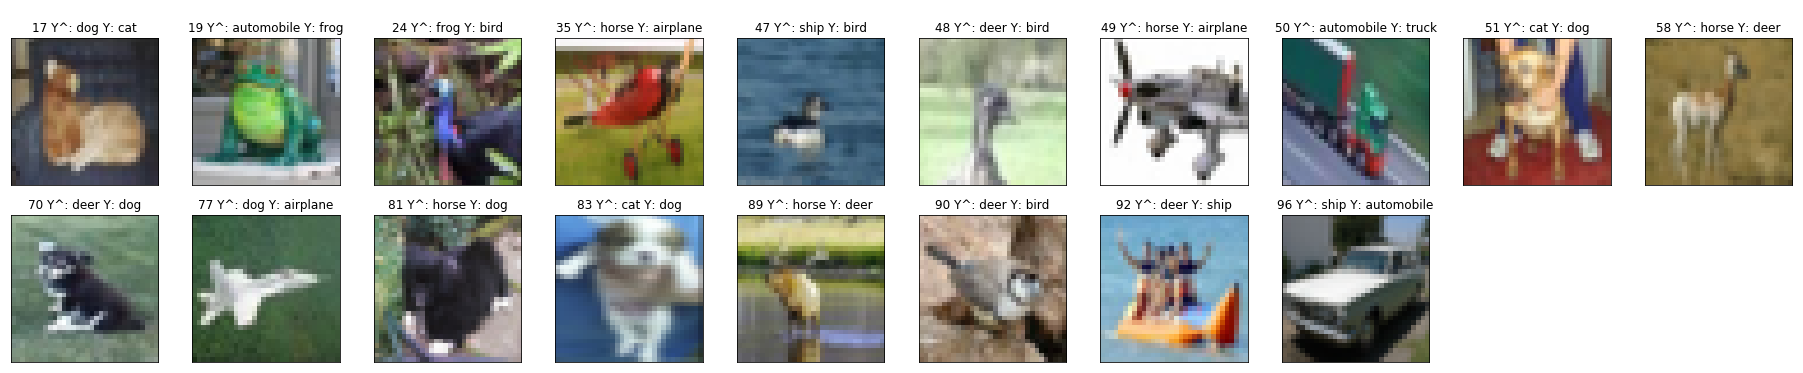

mis-classified images


In [12]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

train_lbl = np.argmax(train_pred[0:100],axis=1)
class_lbl = [np.where(r==1)[0][0] for r in train_labels[0:100]]


fig = plt.figure(figsize=(32,32))
j = 0
mis_class_list = []
for i in range(100):
  
  if train_lbl[i] != class_lbl[i]:
    j += 1
    ax = fig.add_subplot(10, 10, j, xticks=[], yticks=[])
    
    pred = train_lbl[i]
    lbl  = class_lbl[i]
    mis_class_img = train_features[i]
    mis_class_list.append(i)
    
    ax.set_title('\n' + str(i) + ' Y^: ' + class_names[train_lbl[i]] + ' Y: ' + class_names[class_lbl[i]])
    plt.imshow(train_features[i])
    
plt.show()
print('mis-classified images')

In [0]:
print(len(mis_class_list), ' ', mis_class_list)

'''
hence the mis-classified images is the i th training set image
viz: train_features[i]
'''

In [0]:
type(train_features[13])

# implement GRADCAM

granted that the model is not trained, gradcam should highlight random ROI which will seem inaccurate.

this is what the model is seeing right now

### trying to implement on dataset images

Issue with addWeighted

In [0]:
import cv2
#from keras.preprocessing import image
#from PIL import Image

#plt.imshow(img)
#print(type(img))

row = 0
for i in mis_class_list[0:5]:
  #superimposed_img = np.zeros(shape=(32,32,3), dtype=np.uint8)
  img = train_features[i]
  plt.imshow(img)
  
  '''================ GRADCAM ============================================== 
  '''
  x = np.expand_dims(img, axis=1)
  
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer('trans3')

  '''
  get the gradient as a map of the features extracted by the model against 
  the true label
  '''
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0,1,2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

  pooled_grads_val, conv_layer_output_val = iterate([x])

  for i in range(10):
    conv_layer_output_val[:, :, 1] *= pooled_grads_val[i]

  '''
  generate the average/ gradient map
  normalize the map
  '''
  heatmap  = np.mean(conv_layer_output_val, axis= -1)
  heatmap  = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  '''
  display result 
  '''
  #img = cv2.imread(img)
  heatmap = np.reshape(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  #heatmap
  #print('type: ', type(heatmap), ' ', type(img))
  #print('shape: ', heatmap.shape, ' ', img.shape)
  superimposed_img = cv2.addWeighted(img*255, 0.6, heatmap, 0.4, 0)
  #superimposed_img = cv2.bitwise_and(img, heatmap)
  
  '''
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
  ax1.imshow(img)
  ax2.imshow(superimposed_img)
  ax.set_title('\n' + str(i) + ' Y^: ' + class_idx + ' Y: ' + class_output)
  #print(class_idx, ' ', class_output)
  '''

In [0]:
heatmap

In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

# Visualization - kernel

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()